In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from loguru import logger
import numpy as np
import pandas as pd

from exonamd.run import *
from exonamd.plot import pop_plot, simple_plot
from exonamd.solve import solve_namd_mc

from pathlib import Path

In [3]:
file_path = (
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250814.csv"
)

df_exo = pd.read_csv(file_path)

df_interp = interp_db(
    df=df_exo, out_path=Path(file_path).parent / "custom_db_20250814_interp.csv"
)

2025-08-15 15:24:44.694 | INFO     | exonamd.run:interp_db:170 - Thinning down the data with nanmedian
2025-08-15 15:24:44.696 | WARNING  | exonamd.run:interp_db:173 - NaT values in rowupdate: 55
2025-08-15 15:24:44.713 | INFO     | exonamd.run:interp_db:182 - Data thinned down
2025-08-15 15:24:44.714 | INFO     | exonamd.run:interp_db:184 - Checking for duplicates
2025-08-15 15:24:44.717 | INFO     | exonamd.run:interp_db:192 - No duplicates found
2025-08-15 15:24:44.718 | INFO     | exonamd.run:interp_db:194 - Instantiating the flags
2025-08-15 15:24:44.719 | INFO     | exonamd.run:interp_db:196 - Flags instantiated
2025-08-15 15:24:44.721 | INFO     | exonamd.run:interp_db:198 - Interpolating missing eccentricity values


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-15 15:24:44.761 | INFO     | exonamd.run:interp_db:207 - Values interpolated
2025-08-15 15:24:44.763 | INFO     | exonamd.run:interp_db:209 - Interpolating missing planetary mass values


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-15 15:24:45.800 | INFO     | exonamd.run:interp_db:218 - Values interpolated
2025-08-15 15:24:45.803 | DEBUG    | exonamd.run:interp_db:220 - Dropping columns that are no longer needed
2025-08-15 15:24:45.804 | DEBUG    | exonamd.run:interp_db:222 - Columns dropped
2025-08-15 15:24:45.807 | INFO     | exonamd.run:interp_db:224 - Removing systems where at least one planet has no mass or semi-major axis
2025-08-15 15:24:45.818 | INFO     | exonamd.run:interp_db:233 - Removing 0 systems: []
2025-08-15 15:24:45.819 | INFO     | exonamd.run:interp_db:235 - Systems removed
2025-08-15 15:24:45.820 | INFO     | exonamd.run:interp_db:237 - Interpolating missing values in inclinations


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-15 15:24:45.927 | INFO     | exonamd.run:interp_db:246 - Values interpolated
2025-08-15 15:24:45.929 | INFO     | exonamd.run:interp_db:248 - Interpolating missing values in semi-major axis uncertainties


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-15 15:24:45.978 | INFO     | exonamd.run:interp_db:256 - Values interpolated
2025-08-15 15:24:45.979 | INFO     | exonamd.run:interp_db:259 - Computing the relative inclinations


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-15 15:24:46.079 | INFO     | exonamd.run:interp_db:267 - Values computed
2025-08-15 15:24:46.081 | INFO     | exonamd.run:interp_db:269 - Interpolating missing values in true obliquity


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-15 15:24:46.233 | INFO     | exonamd.run:interp_db:278 - Values interpolated
2025-08-15 15:24:46.234 | INFO     | exonamd.run:interp_db:281 - Storing the curated+interpolated database
2025-08-15 15:24:46.240 | INFO     | exonamd.run:interp_db:286 - Database stored at /home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250814_interp.csv


In [4]:
# select only the hostnames for which the flag is "0" for all the planets
# df_interp.groupby("hostname").filter(lambda x: all(x["flag"].isin(["0"]))).hostname.unique()
df_interp.groupby("hostname").filter(
    lambda g: not g["flag"].str.contains("5").any()
)[["hostname", "pl_name", "flag"]]

,hostname,pl_name,flag
53,AU Mic,AU Mic,0
44,HD 118203,HD 118203b,0
45,HD 118203,HD 118203c,0
30,K2-290,K2-290 b,02+-
31,K2-290,K2-290 c,0
32,Kepler-462,Kepler-462 b,0
33,Kepler-462,Kepler-462 c,02+-
23,Kepler-56,Kepler-56b,0
24,Kepler-56,Kepler-56c,0
51,TOI-421,TOI-421b,0


In [5]:
df_interp.groupby("hostname").filter(
    lambda g: not g["flag"].str.contains("5").any()
).hostname.unique()

array(['AU Mic', 'HD 118203', 'K2-290', 'Kepler-462', 'Kepler-56',
       'TOI-421', 'TOI-942'], dtype=object)

In [6]:
file_path = (
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250814.csv"
)

df_exo = pd.read_csv(file_path)

# load /home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20241017e.csv as well
# and concat the databases

# df_ss = pd.read_csv(
#     "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20241017e.csv"
# )
# # take only the systems with hostname equal to "SSE"
# df_ss = df_ss[df_ss.hostname.isin(["SSE"])]

df_fake = pd.read_csv(
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811_fakes.csv"
)
# take only those where the hostname ends with one or multiple "x"
# df_fake = df_fake[df_fake.hostname.str.endswith("x")]

# df_exo = pd.concat([df_exo, df_ss, df_fake], ignore_index=True)
df_exo = pd.concat([df_exo, df_fake], ignore_index=True)

print(df_exo.hostname.unique())
print(df_exo.hostname.nunique())

print(df_exo.groupby("sy_pnum").hostname.nunique())

['WASP-84' 'TOI-1136' 'TOI-5398' 'WASP-47' 'TOI-2076' 'TOI-942' 'HD 3167'
 'Kepler-56' 'WASP-148' 'TOI-451' 'K2-290' 'Kepler-462' 'SS' 'TOI-2202'
 'HD 118203' 'HIP 41378' 'TOI-421' 'AU Mic' '55 Cncx' 'GJ 876x'
 'HD 110067x' 'HD 191939x' 'KOI-351x' 'TOI-942x' 'TOI-942xx' 'TOI-942xxx'
 'TRAPPIST-1x' 'SSE' 'SSEn']
29
sy_pnum
2    13
3     3
4     3
5     2
6     3
7     1
8     4
Name: hostname, dtype: int64


In [7]:
df_interp = interp_db(
    df=df_exo, out_path=Path(file_path).parent / "custom_db_20250811_interp_plus_fakes.csv"
)

2025-08-15 15:24:47.821 | INFO     | exonamd.run:interp_db:170 - Thinning down the data with nanmedian
2025-08-15 15:24:47.824 | WARNING  | exonamd.run:interp_db:173 - NaT values in rowupdate: 83
2025-08-15 15:24:47.840 | INFO     | exonamd.run:interp_db:182 - Data thinned down
2025-08-15 15:24:47.842 | INFO     | exonamd.run:interp_db:184 - Checking for duplicates
2025-08-15 15:24:47.845 | INFO     | exonamd.run:interp_db:192 - No duplicates found
2025-08-15 15:24:47.845 | INFO     | exonamd.run:interp_db:194 - Instantiating the flags
2025-08-15 15:24:47.847 | INFO     | exonamd.run:interp_db:196 - Flags instantiated
2025-08-15 15:24:47.847 | INFO     | exonamd.run:interp_db:198 - Interpolating missing eccentricity values


Pandas Apply:   0%|          | 0/112 [00:00<?, ?it/s]

2025-08-15 15:24:47.902 | INFO     | exonamd.run:interp_db:207 - Values interpolated
2025-08-15 15:24:47.903 | INFO     | exonamd.run:interp_db:209 - Interpolating missing planetary mass values


Pandas Apply:   0%|          | 0/112 [00:00<?, ?it/s]

2025-08-15 15:24:49.170 | INFO     | exonamd.run:interp_db:218 - Values interpolated
2025-08-15 15:24:49.171 | DEBUG    | exonamd.run:interp_db:220 - Dropping columns that are no longer needed
2025-08-15 15:24:49.173 | DEBUG    | exonamd.run:interp_db:222 - Columns dropped
2025-08-15 15:24:49.174 | INFO     | exonamd.run:interp_db:224 - Removing systems where at least one planet has no mass or semi-major axis
2025-08-15 15:24:49.190 | INFO     | exonamd.run:interp_db:233 - Removing 1 systems: ['KOI-351x']
2025-08-15 15:24:49.191 | INFO     | exonamd.run:interp_db:235 - Systems removed
2025-08-15 15:24:49.192 | INFO     | exonamd.run:interp_db:237 - Interpolating missing values in inclinations


Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

2025-08-15 15:24:49.387 | INFO     | exonamd.run:interp_db:246 - Values interpolated
2025-08-15 15:24:49.388 | INFO     | exonamd.run:interp_db:248 - Interpolating missing values in semi-major axis uncertainties


Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

2025-08-15 15:24:49.438 | INFO     | exonamd.run:interp_db:256 - Values interpolated
2025-08-15 15:24:49.439 | INFO     | exonamd.run:interp_db:259 - Computing the relative inclinations


Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

2025-08-15 15:24:49.613 | INFO     | exonamd.run:interp_db:267 - Values computed
2025-08-15 15:24:49.614 | INFO     | exonamd.run:interp_db:269 - Interpolating missing values in true obliquity


Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

2025-08-15 15:24:49.836 | INFO     | exonamd.run:interp_db:278 - Values interpolated
2025-08-15 15:24:49.838 | INFO     | exonamd.run:interp_db:281 - Storing the curated+interpolated database
2025-08-15 15:24:49.843 | INFO     | exonamd.run:interp_db:286 - Database stored at /home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811_interp_plus_fakes.csv


2025-08-15 15:24:49.972 | DEBUG    | exonamd.run:calc_namd:331 - Dropping columns that are no longer needed
2025-08-15 15:24:49.975 | DEBUG    | exonamd.run:calc_namd:333 - Columns dropped
2025-08-15 15:24:49.976 | INFO     | exonamd.run:calc_namd:342 - Computing the relative NAMD


2025-08-15 15:24:50.047 | INFO     | exonamd.run:calc_namd:350 - Relative NAMD computed
2025-08-15 15:24:50.049 | INFO     | exonamd.run:calc_namd:353 - Computing the absolute NAMD
2025-08-15 15:24:50.117 | INFO     | exonamd.run:calc_namd:361 - Absolute NAMD computed
2025-08-15 15:24:50.199 | INFO     | exonamd.run:calc_namd:441 - Computing the Monte Carlo relative NAMD
2025-08-15 15:24:55.188 | INFO     | exonamd.run:calc_namd:452 - Relative NAMD computed
2025-08-15 15:24:55.190 | INFO     | exonamd.run:calc_namd:455 - Computing the Monte Carlo absolute NAMD
2025-08-15 15:24:59.962 | INFO     | exonamd.run:calc_namd:466 - Absolute NAMD computed


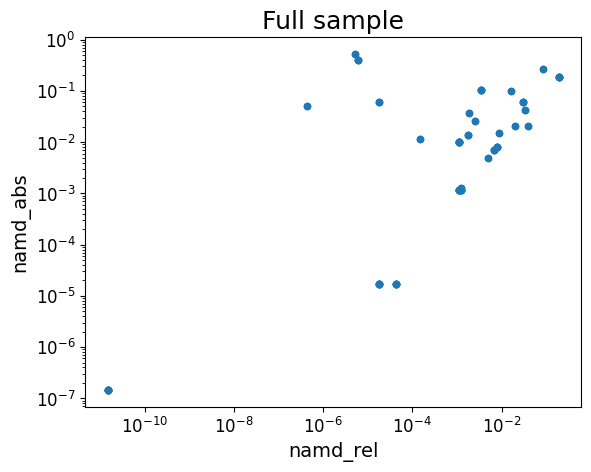

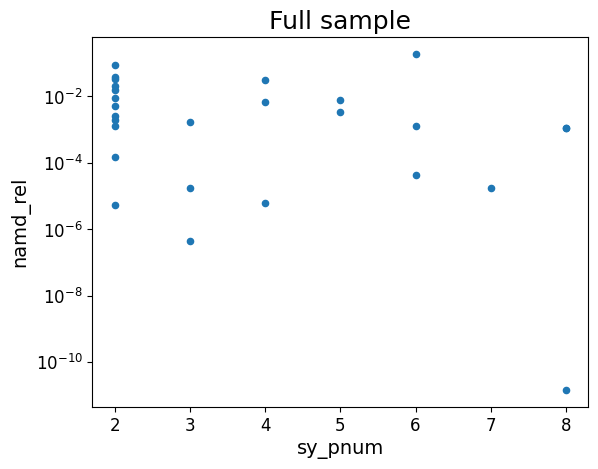

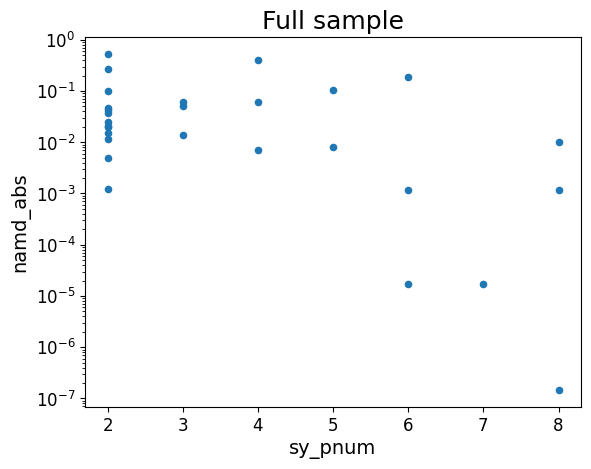

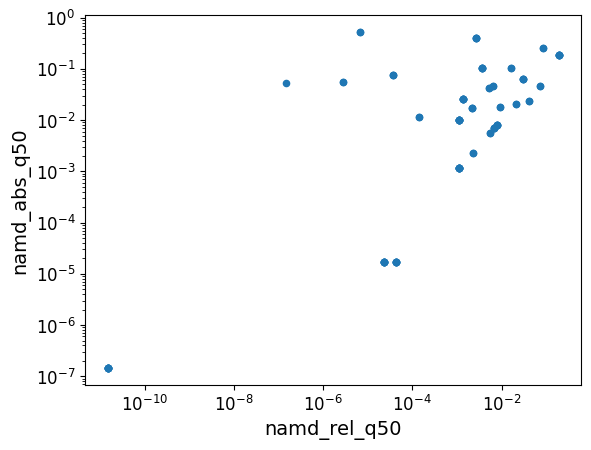

In [8]:
df_namd = calc_namd(
    df=df_interp,
    save=False,
    plot=True,
    core=False,
    filt=None,
    # which=["rel"],
    # which=["abs"],
    which=["rel", "abs"],
    threshold=100,
    # use_trunc_normal=False,
    use_trunc_normal=True,
    Npt=int(1e5),
)

In [9]:
mask = df_namd.hostname == "SS"
cols_rel = ["namd_rel", "namd_rel_mc", "namd_rel_q16", "namd_rel_q50", "namd_rel_q84"]
cols_abs = ["namd_abs", "namd_abs_mc", "namd_abs_q16", "namd_abs_q50", "namd_abs_q84"]

df_namd.loc[mask, cols_rel] = df_namd.loc[mask, cols_abs].to_numpy()

In [10]:
df_namd[df_namd.hostname == "SS"][["namd_rel", "namd_rel_mc", "namd_rel_q16", "namd_rel_q50", "namd_rel_q84"]]

,namd_rel,namd_rel_mc,namd_rel_q16,namd_rel_q50,namd_rel_q84
34,0.001157,NaN,0.001157,0.001157,0.001157
35,0.001157,NaN,0.001157,0.001157,0.001157
36,0.001157,NaN,0.001157,0.001157,0.001157
37,0.001157,NaN,0.001157,0.001157,0.001157
38,0.001157,NaN,0.001157,0.001157,0.001157
39,0.001157,NaN,0.001157,0.001157,0.001157
40,0.001157,NaN,0.001157,0.001157,0.001157
41,0.001157,NaN,0.001157,0.001157,0.001157


In [11]:
df_namd[df_namd.hostname == "SS"][["namd_abs", "namd_abs_mc", "namd_abs_q16", "namd_abs_q50", "namd_abs_q84"]]


,namd_abs,namd_abs_mc,namd_abs_q16,namd_abs_q50,namd_abs_q84
34,0.001157,NaN,0.001157,0.001157,0.001157
35,0.001157,NaN,0.001157,0.001157,0.001157
36,0.001157,NaN,0.001157,0.001157,0.001157
37,0.001157,NaN,0.001157,0.001157,0.001157
38,0.001157,NaN,0.001157,0.001157,0.001157
39,0.001157,NaN,0.001157,0.001157,0.001157
40,0.001157,NaN,0.001157,0.001157,0.001157
41,0.001157,NaN,0.001157,0.001157,0.001157


In [12]:
df_namd[~df_namd.hostname.isin(df_fake.hostname.unique())].hostname.nunique()

18

2025-08-15 15:25:02.782 | INFO     | __main__:<module>:4 - Plotting the absolute NAMD vs. multiplicity


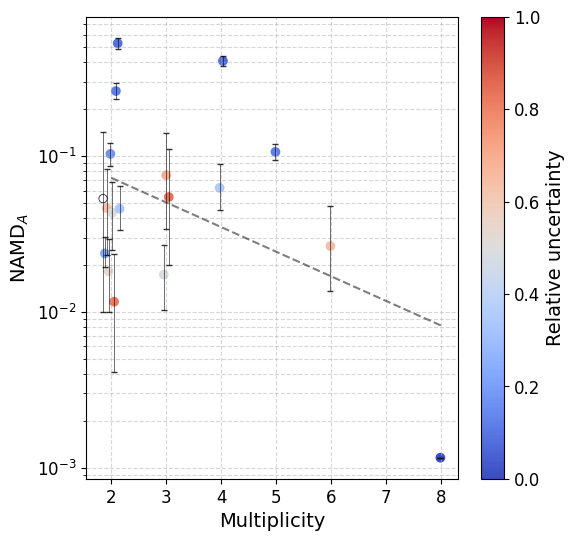

2025-08-15 15:25:03.499 | INFO     | __main__:<module>:18 - Plot done


In [13]:
# for this figure we need to define df_namd_ without systems with hostname in df_fake
df_namd_ = df_namd[~df_namd.hostname.isin(df_fake.hostname.unique())]

logger.info("Plotting the absolute NAMD vs. multiplicity")
pop_plot(
    df=df_namd_.groupby("hostname").apply(
        lambda g: g.select_dtypes(exclude=["object"]).mean(),
        include_groups=False,
    ),
    kind="abs",
    # title="Core planets",
    which="namd",
    yscale="log",
    outpath="/home/ariel/andrea.bocchieri/DATA/ExoNAMD/notebook/plots/exo_namd_abs_paper.pdf",
    replace_nan=False,
    xoffs=0.15,
)
logger.info("Plot done")

In [14]:
print(df_namd_.hostname.nunique())
print(df_namd_.groupby("sy_pnum").hostname.nunique())

18
sy_pnum
2    10
3     3
4     2
5     1
6     1
8     1
Name: hostname, dtype: int64


In [15]:
df_namd.hostname.unique()

array(['55 Cncx', 'AU Mic', 'GJ 876x', 'HD 110067x', 'HD 118203',
       'HD 191939x', 'HD 3167', 'HIP 41378', 'K2-290', 'Kepler-462',
       'Kepler-56', 'SS', 'SSE', 'SSEn', 'TOI-1136', 'TOI-2076',
       'TOI-2202', 'TOI-421', 'TOI-451', 'TOI-5398', 'TOI-942',
       'TOI-942x', 'TOI-942xx', 'TOI-942xxx', 'TRAPPIST-1x', 'WASP-148',
       'WASP-47', 'WASP-84'], dtype=object)

In [16]:
df_namd_plot = df_namd_.groupby("hostname")[
    [
        "namd_rel",
        "namd_abs",
        "namd_rel_q16",
        "namd_rel_q50",
        "namd_rel_q84",
        "namd_abs_q16",
        "namd_abs_q50",
        "namd_abs_q84",
    ]
].apply(lambda g: g.select_dtypes(exclude=["object"]).mean())

df_namd_fake = (
    df_namd[df_namd.hostname.isin(df_fake.hostname.unique())]
    .groupby("hostname")[
        [
            "namd_rel",
            "namd_abs",
            "namd_rel_q16",
            "namd_rel_q50",
            "namd_rel_q84",
            "namd_abs_q16",
            "namd_abs_q50",
            "namd_abs_q84",
        ]
    ]
    .apply(lambda g: g.select_dtypes(exclude=["object"]).mean())
)

print(len(df_namd_plot), len(df_namd_fake))

18 10


In [24]:
# df_namd_plot
# print with 5 decimals
df_namd_plot.round(6)

,namd_rel,namd_abs,namd_rel_q16,namd_rel_q50,namd_rel_q84,namd_abs_q16,namd_abs_q50,namd_abs_q84
hostname,,,,,,,,
AU Mic,0.000000,0.046231,0.000000,0.000000,0.000001,0.009952,0.053300,0.142132
HD 118203,0.033952,0.041910,0.039418,0.074284,0.195373,0.033284,0.045909,0.064265
HD 3167,0.000006,0.405599,0.000773,0.002650,0.007002,0.378284,0.408063,0.438316
HIP 41378,0.003471,0.104305,0.001465,0.003611,0.008417,0.094057,0.106402,0.119661
K2-290,0.000005,0.529446,0.000003,0.000007,0.000014,0.485048,0.529404,0.575141
Kepler-462,0.086721,0.263938,0.060981,0.084491,0.108954,0.231952,0.261607,0.294793
Kepler-56,0.000000,0.051676,0.000001,0.000003,0.000007,0.019858,0.054579,0.111333
SS,0.001157,0.001157,0.001157,0.001157,0.001157,0.001157,0.001157,0.001157
TOI-1136,0.001265,0.001188,0.001115,0.001346,0.001620,0.013514,0.026429,0.047506


In [17]:
df_namd_fake

,namd_rel,namd_abs,namd_rel_q16,namd_rel_q50,namd_rel_q84,namd_abs_q16,namd_abs_q50,namd_abs_q84
hostname,,,,,,,,
55 Cncx,8.035724e-03,8.035726e-03,5.864201e-03,8.106578e-03,1.076627e-02,5.792785e-03,8.071404e-03,1.068353e-02
GJ 876x,6.951919e-03,6.951921e-03,6.884593e-03,6.957213e-03,7.030614e-03,6.885683e-03,6.957320e-03,7.030352e-03
HD 110067x,4.233427e-05,1.709887e-05,3.820725e-05,4.350199e-05,4.983980e-05,1.709887e-05,1.709887e-05,1.709887e-05
HD 191939x,1.897625e-01,1.897618e-01,1.897690e-01,1.897937e-01,1.898805e-01,1.897611e-01,1.897619e-01,1.897628e-01
SSE,1.141626e-03,1.012178e-02,1.141626e-03,1.141626e-03,1.141626e-03,1.012178e-02,1.012178e-02,1.012178e-02
SSEn,1.458319e-11,1.465562e-07,1.458317e-11,1.458319e-11,1.458322e-11,1.465562e-07,1.465562e-07,1.465562e-07
TOI-942x,2.020410e-02,2.020410e-02,1.374689e-02,2.078242e-02,2.940494e-02,1.370058e-02,2.069317e-02,2.938595e-02
TOI-942xx,5.012563e-03,5.012563e-03,2.568894e-03,5.657845e-03,1.032694e-02,2.586403e-03,5.668782e-03,1.031599e-02
TOI-942xxx,1.250782e-03,1.250782e-03,7.334450e-04,2.245756e-03,5.054171e-03,7.447844e-04,2.240711e-03,5.095775e-03


0


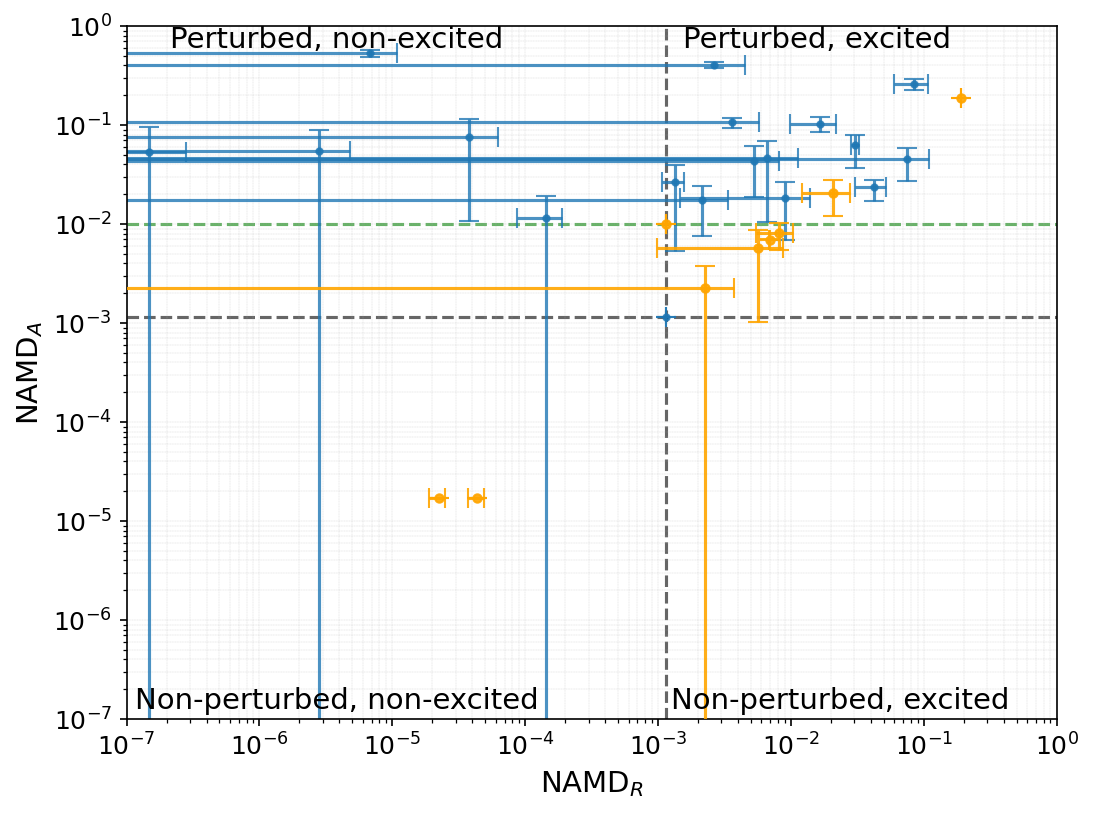

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6), dpi=150)

plt.yscale("log")
plt.xscale("log")
plt.xlabel(r"NAMD$_R$")
plt.ylabel(r"NAMD$_A$")

# plt.plot(
#     df_namd_plot["namd_rel"],
#     df_namd_plot["namd_abs"],
#     "s",
#     color="C1",
#     alpha=0.7,
# )

plt.errorbar(
    x=df_namd_plot["namd_rel_q50"],
    y=df_namd_plot["namd_abs_q50"],
    xerr=(
        df_namd_plot["namd_rel_q84"] - df_namd_plot["namd_rel_q50"],
        df_namd_plot["namd_rel_q50"] - df_namd_plot["namd_rel_q16"],
    ),
    yerr=(
        df_namd_plot["namd_abs_q84"] - df_namd_plot["namd_abs_q50"],
        df_namd_plot["namd_abs_q50"] - df_namd_plot["namd_abs_q16"],
    ),
    fmt="o",
    markersize=3,
    capsize=5,
    alpha=0.8,
)

plt.errorbar(
    x=df_namd_fake["namd_rel_q50"],
    y=df_namd_fake["namd_abs_q50"],
    xerr=(
        df_namd_fake["namd_rel_q84"] - df_namd_fake["namd_rel_q50"],
        df_namd_fake["namd_rel_q50"] - df_namd_fake["namd_rel_q16"],
    ),
    yerr=(
        df_namd_fake["namd_abs_q84"] - df_namd_fake["namd_abs_q50"],
        df_namd_fake["namd_abs_q50"] - df_namd_fake["namd_abs_q16"],
    ),
    fmt="o",
    markersize=4,
    capsize=5,
    alpha=0.9,
    zorder=10,
    color="orange",
)

# SS = df_namd_plot[df_namd_plot.index == "SS"]

# plt.errorbar(
#     x=SS["namd_rel_q50"],
#     y=SS["namd_abs_q50"],
#     xerr=(
#         SS["namd_rel_q84"] - SS["namd_rel_q50"],
#         SS["namd_rel_q50"] - SS["namd_rel_q16"],
#     ),
#     yerr=(
#         SS["namd_abs_q84"] - SS["namd_abs_q50"],
#         SS["namd_abs_q50"] - SS["namd_abs_q16"],
#     ),
#     fmt="o",
#     markersize=3,
#     capsize=5,
#     alpha=0.5,
#     color="r",
# )

missing_mc = df_namd_plot[
    np.logical_or(
        df_namd_plot["namd_abs_q50"].isna(), df_namd_plot["namd_rel_q50"].isna()
    )
]
print(len(missing_mc))

plt.plot(
    missing_mc["namd_rel"],
    missing_mc["namd_abs"],
    "o",
    color="k",
    alpha=0.5,
    markersize=3,
)

ymin = 1e-7
ymax = 1
xmin = 1e-7
xmax = 1

# xmin = xmax = ymin = ymax = None

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# plt.vlines(1.3e-3, *plt.ylim(), colors=["k"], linestyles=["--"])
# plt.hlines(1.3e-3, *plt.xlim(), colors=["k"], linestyles=["--"])

plt.vlines(
    df_namd_plot.loc["SS"]["namd_rel"],
    *plt.ylim(),
    colors=["k"],
    linestyles=["--"],
    alpha=0.6,
    zorder=0
)
plt.hlines(
    df_namd_plot.loc["SS"]["namd_abs"],
    *plt.xlim(),
    colors=["k"],
    linestyles=["--"],
    alpha=0.6,
    zorder=0
)

# plt.vlines(df_namd_ss.loc["SSE"]["namd_rel"], *plt.ylim(), colors=["b"], linestyles=["--"], alpha=0.3, zorder=0)
plt.hlines(
    df_namd_fake.loc["SSE"]["namd_abs"],
    *plt.xlim(),
    colors=["g"],
    linestyles=["--"],
    alpha=0.6,
    zorder=0
)

fig.text(0.3, 0.865, "Perturbed, non-excited", ha="center", va="center")
fig.text(0.7, 0.865, "Perturbed, excited", ha="center", va="center")

fig.text(0.3, 0.13, "Non-perturbed, non-excited", ha="center", va="center")
fig.text(0.72, 0.13, "Non-perturbed, excited", ha="center", va="center")
plt.grid(which="both", lw=0.15, ls="--", alpha=0.8)

plt.savefig(
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/notebook/plots/four_quadrants_plot_paper.pdf",
    bbox_inches="tight",
    dpi=300,
)
plt.show()

In [26]:
df_namd_plot.loc["SS"][["namd_rel", "namd_abs"]], df_namd_fake.loc["SSE"]["namd_abs"]

(namd_rel    0.001157
 namd_abs    0.001157
 Name: SS, dtype: float64,
 0.010121775638911982)

In [19]:
# sort df_namd_fake by the namd_rel_q50
df_namd_fake.sort_values("namd_rel_q50")

,namd_rel,namd_abs,namd_rel_q16,namd_rel_q50,namd_rel_q84,namd_abs_q16,namd_abs_q50,namd_abs_q84
hostname,,,,,,,,
SSEn,1.458319e-11,1.465562e-07,1.458317e-11,1.458319e-11,1.458322e-11,1.465562e-07,1.465562e-07,1.465562e-07
TRAPPIST-1x,1.754423e-05,1.709887e-05,2.014984e-05,2.261152e-05,2.633491e-05,1.709887e-05,1.709887e-05,1.709887e-05
HD 110067x,4.233427e-05,1.709887e-05,3.820725e-05,4.350199e-05,4.983980e-05,1.709887e-05,1.709887e-05,1.709887e-05
SSE,1.141626e-03,1.012178e-02,1.141626e-03,1.141626e-03,1.141626e-03,1.012178e-02,1.012178e-02,1.012178e-02
TOI-942xxx,1.250782e-03,1.250782e-03,7.334450e-04,2.245756e-03,5.054171e-03,7.447844e-04,2.240711e-03,5.095775e-03
TOI-942xx,5.012563e-03,5.012563e-03,2.568894e-03,5.657845e-03,1.032694e-02,2.586403e-03,5.668782e-03,1.031599e-02
GJ 876x,6.951919e-03,6.951921e-03,6.884593e-03,6.957213e-03,7.030614e-03,6.885683e-03,6.957320e-03,7.030352e-03
55 Cncx,8.035724e-03,8.035726e-03,5.864201e-03,8.106578e-03,1.076627e-02,5.792785e-03,8.071404e-03,1.068353e-02
TOI-942x,2.020410e-02,2.020410e-02,1.374689e-02,2.078242e-02,2.940494e-02,1.370058e-02,2.069317e-02,2.938595e-02


In [20]:
df_namd[df_namd["hostname"]=="TOI-942"][["pl_name", "pl_bmasse", "flag", "namd_rel", "namd_rel_q50", "namd_abs", "namd_abs_q50"]]

,pl_name,pl_bmasse,flag,namd_rel,namd_rel_q50,namd_abs,namd_abs_q50
17,TOI-942b,17.857443,02+-,0.002592,0.006592,0.025319,0.046325
18,TOI-942c,27.239353,02+-,0.002592,0.006592,0.025319,0.046325
